In [21]:
# Cargar las librerias necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

**Cargamos el DataSet sin outliers**

In [2]:
# Cargar el DataSet
df_troll_2024_sin_outliers = pd.read_csv('../data/processed/troll_a_2024_sin_outliers.csv')
df_troll_2024_sin_outliers.head(20)

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,TEMP,DEWP,SLP,STP,VISIB,WDSP,MXSPD,GUST,MAX,MIN
0,1087799999,2024-01-01,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",3.777778,-2.944444,9999.9,999.9,0.997791,50.5596,62.9680,1851.8148,5.0,2.0
1,1087799999,2024-01-02,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",1.888889,-5.277778,9999.9,999.9,0.997791,51.3004,66.4868,1851.8148,3.0,0.0
2,1087799999,2024-01-03,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",-0.222222,-8.277778,9999.9,999.9,0.997791,33.1508,53.5228,1851.8148,1.0,-1.0
3,1087799999,2024-01-04,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",0.388889,-6.277778,9999.9,999.9,0.981697,34.8176,48.1520,1851.8148,1.0,-1.0
4,1087799999,2024-01-05,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",-0.388889,-7.777778,9999.9,999.9,0.997791,27.7800,42.4108,1851.8148,0.0,-1.0
5,1087799999,2024-01-06,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",0.722222,-5.777778,9999.9,999.9,0.997791,32.5952,51.8560,1851.8148,2.0,0.0
6,1087799999,2024-01-07,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",2.833333,0.166667,9999.9,999.9,0.981697,48.5224,59.4492,1851.8148,4.0,2.0
7,1087799999,2024-01-08,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",4.444444,2.666667,9999.9,999.9,0.869044,26.4836,37.0400,1851.8148,6.0,3.0
8,1087799999,2024-01-09,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",5.388889,3.111111,9999.9,999.9,0.997791,30.1876,57.5972,1851.8148,6.0,5.0
9,1087799999,2024-01-10,60.633333,3.716667,90.0,"TROLL A OIL PLATFORM, NO",6.277778,1.777778,9999.9,999.9,0.997791,61.6716,68.3388,1851.8148,7.0,6.0


**Determinar la distribución de los datos**

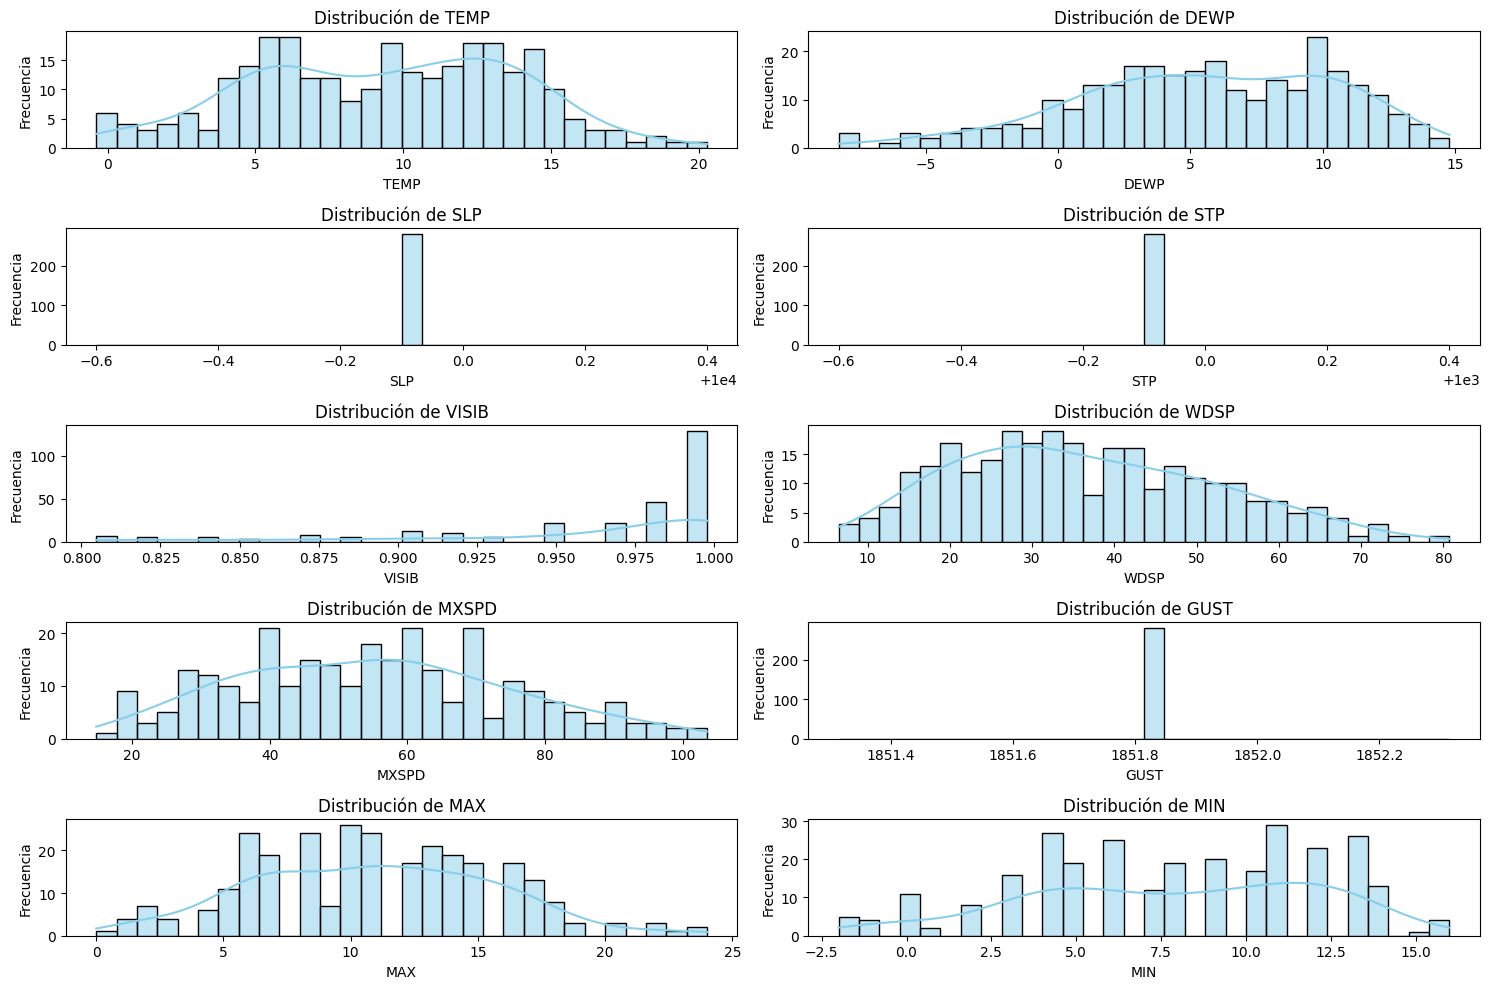

In [ ]:
col_lista = ['TEMP', 'DEWP', 'SLP', 'STP', 'VISIB', 'WDSP', 'MXSPD', 'GUST', 'MAX', 'MIN']

plt.figure(figsize=(15, 10))  # Ajusta el tamaño de la figura para que quepan todos los histogramas

for i, col in enumerate(col_lista):
    plt.subplot(5, 2, i + 1)  # Crea subgráficos en una cuadrícula de 5x2
    sns.histplot(df_troll_2024_sin_outliers[col], bins=30, color='skyblue', kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()  # Ajusta el diseño para evitar superposiciones
plt.show()

* TEMP, MAX y MIN tienen una distribución normal.
* DEWP y WDSP tienen una distribución normal.
* VISIB podría considerarse una distribución beta.
* WDSP y MXSPD podrian considerarse distribuciones Gamma.
* SLP, STP y GUST no tienen una distribución probabilística típica debido a la falta de variabilidad (Se descartan del análisis debido a la falta de variabilidad ya que es necesario para el análisis estadístico).

**Se realizara unas pruebas estadísticas de normalidad (como la prueba de Shapiro-Wilk) para confirmar**

In [ ]:
col_lista2 = ['TEMP', 'DEWP', 'VISIB', 'WDSP', 'MXSPD', 'MAX', 'MIN']

In [53]:

for columna in col_lista2:
    stat, p = shapiro(df_troll_2024_sin_outliers[columna])
    print(f'\nPrueba de Shapiro-Wilk para {columna}: Estadístico={stat}, p={p}')
    alpha = 0.05
    if p > alpha:
        print(f'{columna} parece tener una distribución normal (no se rechaza la hipótesis nula)')
    else:
        print(f'{columna} no parece tener una distribución normal (se rechaza la hipótesis nula)')


Prueba de Shapiro-Wilk para TEMP: Estadístico=0.9827954889378826, p=0.0018427821954684986
TEMP no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para DEWP: Estadístico=0.9778593181394415, p=0.00023780619873288968
DEWP no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para VISIB: Estadístico=0.7215488442065502, p=2.289244316088672e-21
VISIB no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para WDSP: Estadístico=0.9786846266396634, p=0.00033053151464648126
WDSP no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para MXSPD: Estadístico=0.9852656752712367, p=0.005523317657600479
MXSPD no parece tener una distribución normal (se rechaza la hipótesis nula)

Prueba de Shapiro-Wilk para MAX: Estadístico=0.9880257331001535, p=0.01989747667189898
MAX no parece tener una distribución normal (se rechaza la hipótesis nul

* TEMP, DEWP, VISIB, WDSP, MXSPD, MAX y MIN:
    * El valor p es menor que 0.05 para todas estas variables. Por lo tanto, se rechaza la hipótesis nula y se concluye que estas variables no siguen una distribución normal.
    
( utilizar pruebas estadísticas no paramétricas, ya que la mayoría de tus datos no son normales.)

### **Intervalos de Confianza**

 **TEMP, DEWP, MAX y MIN** mostraron una distribución que se asemeja a la normal, aunque la prueba de Shapiro-Wilk rechazó la normalidad. Debido a que tenemos un tamaño de muestra relativamente grande, podemos usar el teorema del límite central y asumir que la distribución de la media muestral se aproxima a una distribución normal. podemos utilizar intervalos de confianza basados en la distribución t de Student para estas variables.

In [54]:
for i in col_lista2:

    datos = df_troll_2024_sin_outliers[i]

    # Nivel de confianza (por ejemplo, 95%)
    nivel_confianza = 0.95

    # Calcular el intervalo de confianza
    intervalo = stats.t.interval(nivel_confianza, len(datos)-1, loc=np.mean(datos), scale=stats.sem(datos))

    print(f"Intervalo de confianza al {nivel_confianza*100:.0f}% ({i}): {intervalo}")

Intervalo de confianza al 95% (TEMP): (np.float64(8.781253545521654), np.float64(9.815029570334417))
Intervalo de confianza al 95% (DEWP): (np.float64(4.948089208710519), np.float64(6.087497979901581))
Intervalo de confianza al 95% (VISIB): (np.float64(0.9552970103253677), np.float64(0.9676638380732085))
Intervalo de confianza al 95% (WDSP): (np.float64(34.653603443278776), np.float64(38.29674246419453))
Intervalo de confianza al 95% (MXSPD): (np.float64(52.649043258569456), np.float64(57.271440727195674))
Intervalo de confianza al 95% (MAX): (np.float64(10.310775786319942), np.float64(11.42587901795052))
Intervalo de confianza al 95% (MIN): (np.float64(7.271944909262279), np.float64(8.279656514225266))


**VISIB, WDSP y MXSPD** no siguen una distribución normal. Para estas variables, podemos utilizar intervalos de confianza no paramétricos, como los intervalos de confianza de bootstrap.

In [55]:
# Función para calcular la media (puedes usar otras funciones estadísticas)
def media_bootstrap(datos):
    return np.mean(datos)

for i in col_lista2:
    datos = df_troll_2024_sin_outliers[i]
    # Calcular el intervalo de confianza bootstrap
    intervalo = stats.bootstrap((datos,), media_bootstrap, confidence_level=0.95)

    print(f"Intervalo de confianza bootstrap al 95% ({i}): {intervalo.confidence_interval}")

Intervalo de confianza bootstrap al 95% (TEMP): ConfidenceInterval(low=np.float64(8.77856860419138), high=np.float64(9.804923243922175))
Intervalo de confianza bootstrap al 95% (DEWP): ConfidenceInterval(low=np.float64(4.939699485962832), high=np.float64(6.084618426255437))
Intervalo de confianza bootstrap al 95% (VISIB): ConfidenceInterval(low=np.float64(0.9550087010676156), high=np.float64(0.9672648846975089))
Intervalo de confianza bootstrap al 95% (WDSP): ConfidenceInterval(low=np.float64(34.67869371283381), high=np.float64(38.31605375878473))
Intervalo de confianza bootstrap al 95% (MXSPD): ConfidenceInterval(low=np.float64(52.64682089082273), high=np.float64(57.19745265108275))
Intervalo de confianza bootstrap al 95% (MAX): ConfidenceInterval(low=np.float64(10.330960854092528), high=np.float64(11.437250336525155))
Intervalo de confianza bootstrap al 95% (MIN): ConfidenceInterval(low=np.float64(7.274021352313167), high=np.float64(8.281209181456173))


**SLP, STP, GUST**. Estas variables tienen muy poca variabilidad, lo que dificulta la estimación de intervalos de confianza significativos. Debido a la naturaleza de estos datos, no se recomienda calcular intervalos de confianza para estas variables. (Se descarta del análisis)

### **Pueba de Hipotesis**

### **Hipótesis sobre la Temperatura Promedio (Variación Mensual):**
* H0: La temperatura promedio en la plataforma Troll A en 2024 no muestra variaciones significativas a lo largo de los meses del año.
* H1: La temperatura promedio en la plataforma Troll A en 2024 varía significativamente a lo largo de los meses del año.


### **2. Hipótesis sobre la Velocidad del Viento (Variación Anual):**
* H0: La velocidad promedio del viento en la plataforma Troll A en 2024 no muestra variaciones significativas a lo largo del año.
* H1: La velocidad promedio del viento en la plataforma Troll A en 2024 muestra variaciones significativas a lo largo del año.

### **3. Hipótesis sobre la Visibilidad (Correlación):**
* H0: La visibilidad en la plataforma Troll A en 2024 no está correlacionada con otras variables climáticas (como la precipitación o la temperatura).
* H1: La visibilidad en la plataforma Troll A en 2024 está correlacionada con otras variables climáticas.

### **4. Hipótesis sobre la Temperatura y la Hora del Día (Variación Diurna):**
* H0: No hay diferencia significativa en la temperatura promedio entre las diferentes horas del día.
* H1: La temperatura promedio varía significativamente a lo largo del día.

#### **5. Hipótesis sobre la Temperatura Mínima y la Presión Atmosférica (Correlación):**
* H0: No hay correlación significativa entre la temperatura mínima y la presión atmosférica.
* H1: Existe una correlación significativa entre la temperatura mínima y la presión atmosférica.